In [77]:
#Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['science', 'ieee', 'grid', 'no-latex'])
plt.style.use(['science', 'ieee', 'grid', 'no-latex'])
plt.rcParams['savefig.facecolor'] = (1.0, 1.0, 1.0, 1.0)
plt.rcParams['figure.facecolor'] = (1.0, 1.0, 1.0, 1.0)
plt.rcParams['figure.figsize'] = 10, 7
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 'small'
plt.rcParams['legend.title_fontsize'] = 'small'
plt.rcParams['xtick.labelsize'] = 4
import pandas as pd
import pickle

data = {}

with open("data_boston.pickle", 'rb') as f:
    data = pickle.load(f)
    
dict_gp_KL = data['dict_gp_KL']
dict_gp_ard = data['dict_gp_ard']
dict_lime = data['dict_lime']

In [78]:
mean_gp_KL = {}
mean_gp_ard = {}
mean_lime = {}

for val in dict_gp_KL:
    mean_gp_KL[val] = {}
    mean_gp_ard[val] = {}
    mean_lime[val] = {}
    for entry in dict_gp_KL[val]:
        mean_gp_KL[val][entry] = np.mean(dict_gp_KL[val][entry])
        mean_gp_ard[val][entry] = np.mean(dict_gp_ard[val][entry])
        mean_lime[val][entry] = np.mean(dict_lime[val][entry])

In [79]:
top_gp_KL = {}
top_gp_ard = {}
top_lime = {}


for val in mean_gp_KL:
    top_gp_KL[val] = sorted(mean_gp_KL[val].items(), key=lambda x: x[1], reverse=True)
    top_gp_ard[val] = sorted(mean_gp_ard[val].items(), key=lambda x: x[1], reverse=True)
    top_lime[val] = sorted(mean_lime[val].items(), key=lambda x: x[1], reverse=True)

In [80]:
ans = {}
limit = 5

for val in top_gp_KL:
    ans[val] = {}
    ans[val]['lime'] = []
    ans[val]['gp_ard'] = []
    ans[val]['gp_KL'] = []
    for i in range(limit):
        ans[val]['lime'].append(top_lime[val][i])
        ans[val]['gp_ard'].append(top_gp_ard[val][i])
        ans[val]['gp_KL'].append(top_gp_KL[val][i])

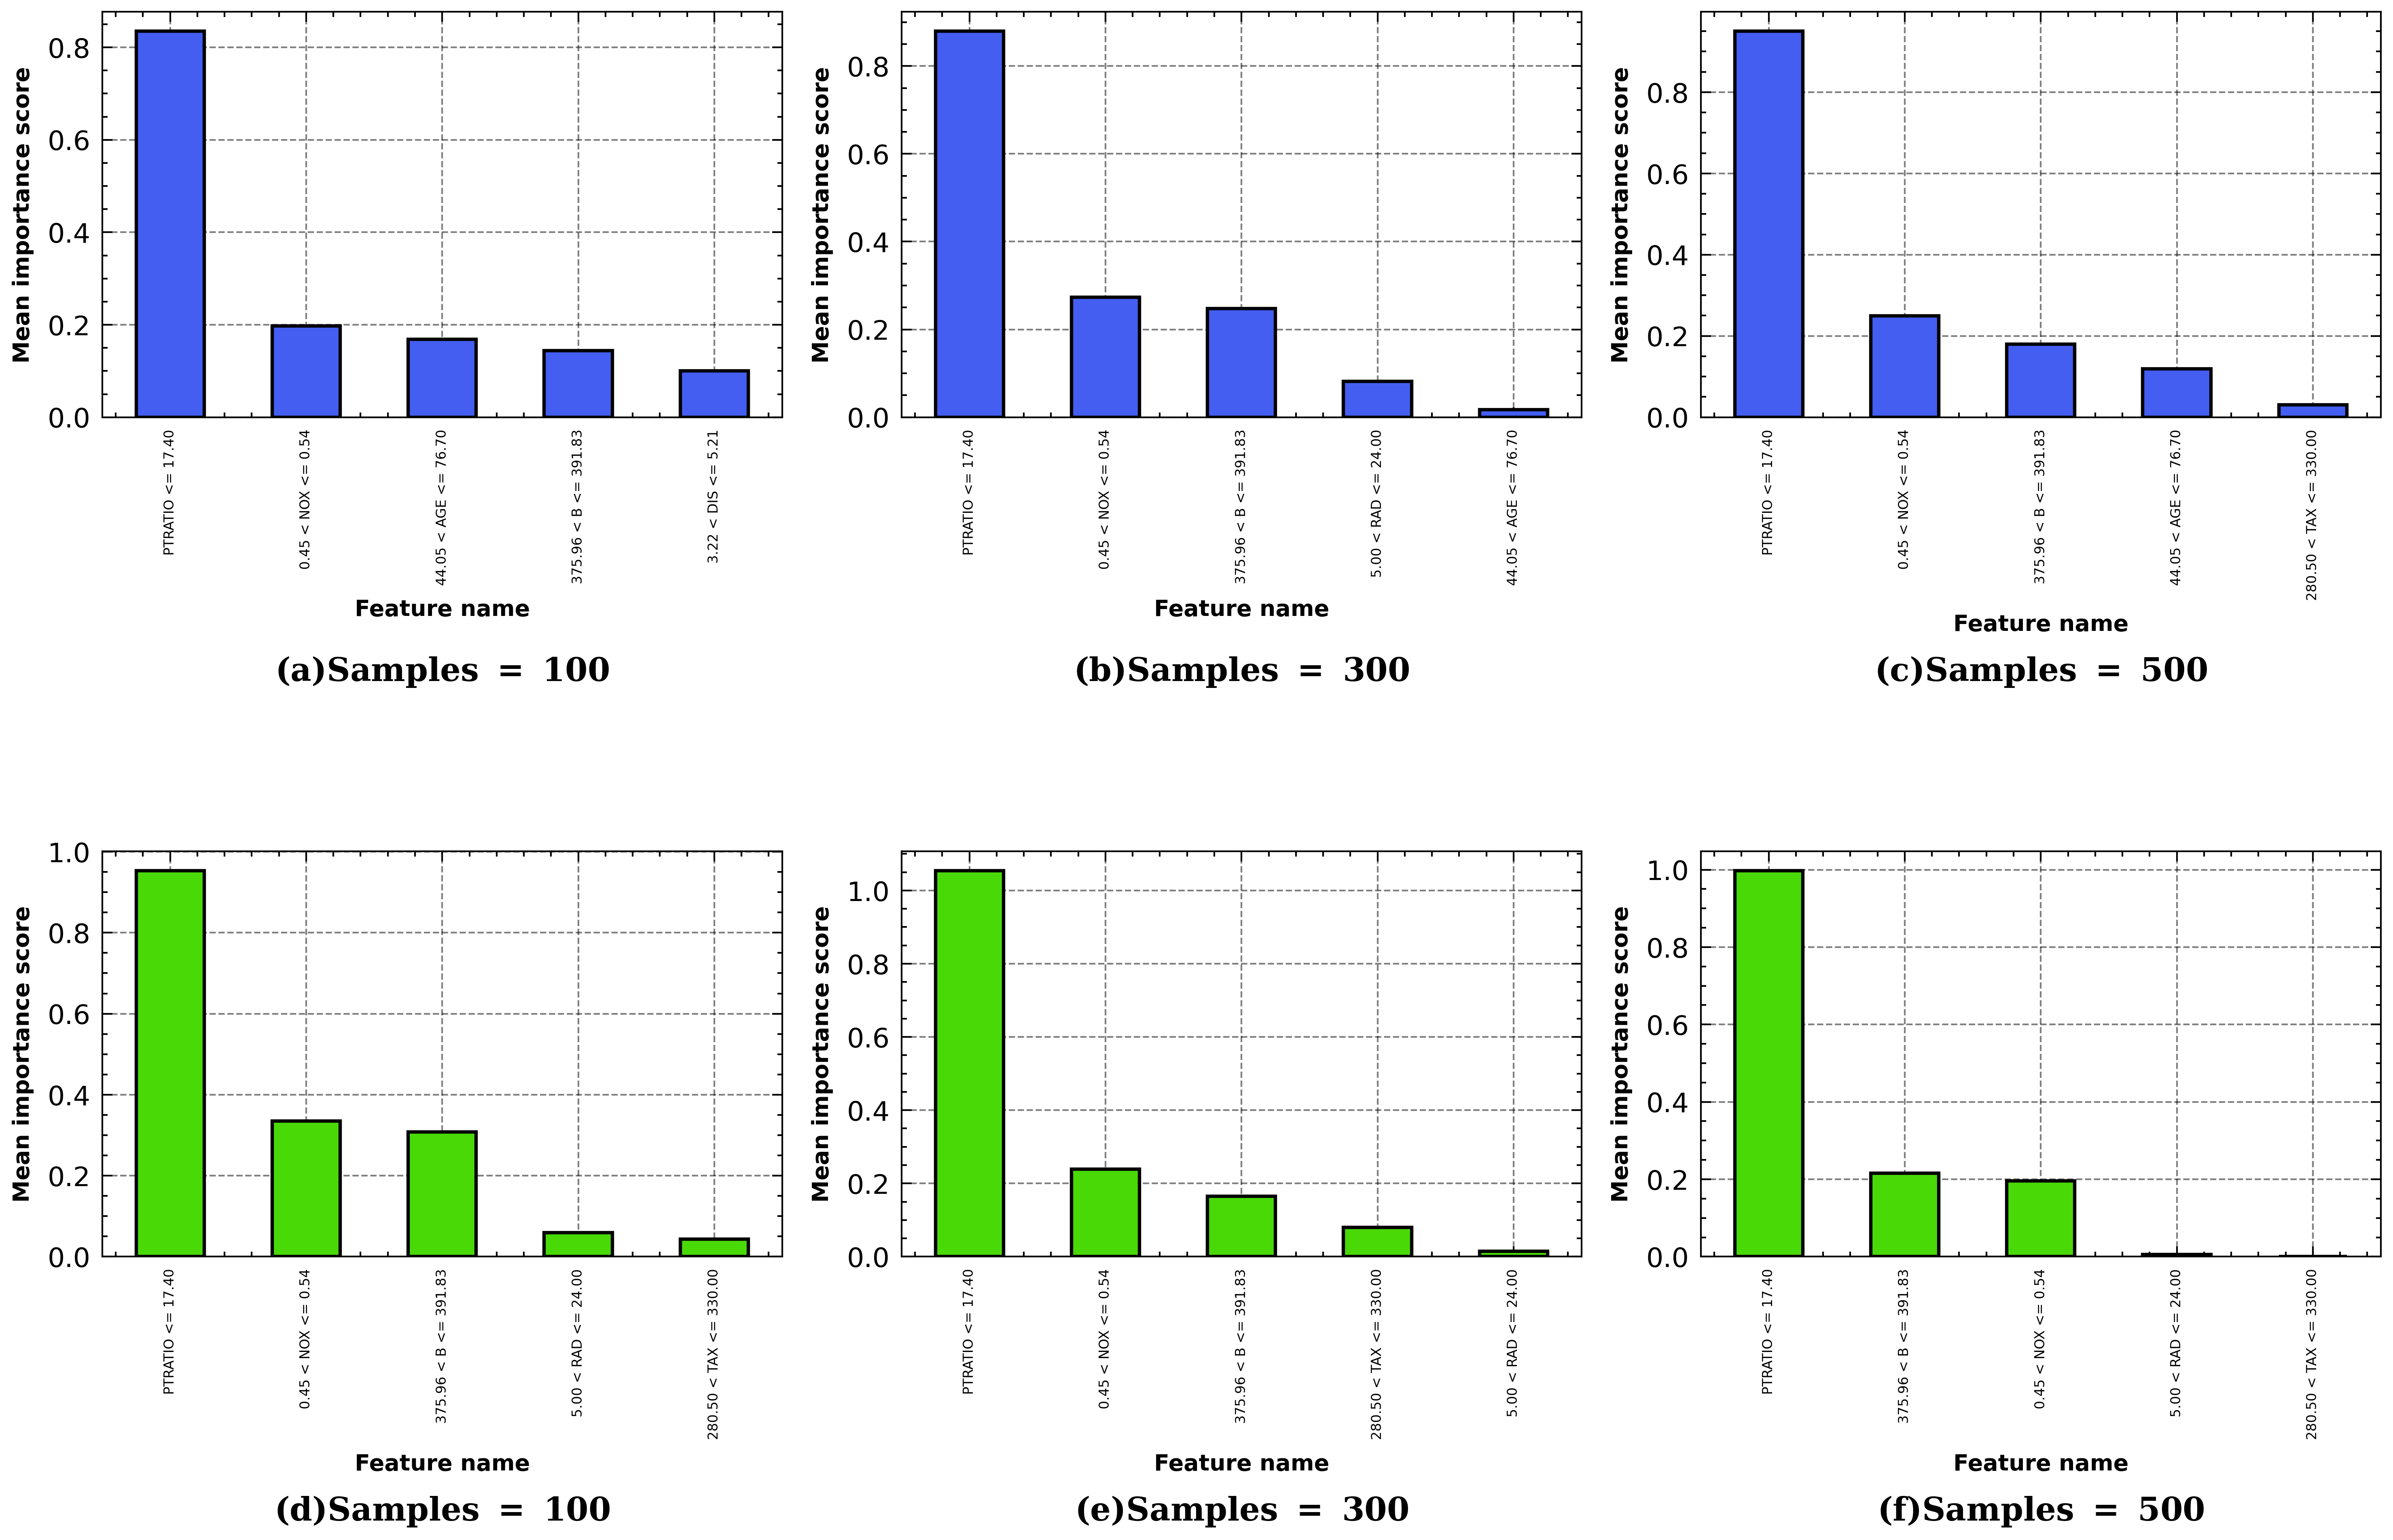

In [81]:
val = 100

df_lime=pd.DataFrame(ans[val]['lime']).set_index(pd.DataFrame(ans[val]['lime'])[0])
df_gp_ard=pd.DataFrame(ans[val]['gp_ard']).set_index(pd.DataFrame(ans[val]['gp_ard'])[0])
df_gp_KL = pd.DataFrame(ans[val]['gp_KL']).set_index(pd.DataFrame(ans[val]['gp_KL'])[0])

common_features = list(set(list(df_lime.index)) & set(list(df_gp_ard.index)))
plt.subplot(2,3,4)
df_lime[1].plot(kind='bar', color = '#49D907', edgecolor = 'black')
plt.xlabel("Feature name")
plt.ylabel("Mean importance score")
plt.title(r"$\bf{(d)Samples\ =\ 100}$", y=-0.7)

plt.subplot(2,3,1)
df_gp_ard[1].plot(kind='bar', color = '#445EF2', edgecolor = 'black')
plt.title("GP with ARD", y=-0.4)
plt.xlabel("Feature name")
plt.ylabel("Mean importance score")
val = 300
plt.title(r"$\bf{(a)Samples\ =\ 100}$", y=-0.7)

df_lime=pd.DataFrame(ans[val]['lime']).set_index(pd.DataFrame(ans[val]['lime'])[0])
df_gp_ard=pd.DataFrame(ans[val]['gp_ard']).set_index(pd.DataFrame(ans[val]['gp_ard'])[0])
df_gp_KL = pd.DataFrame(ans[val]['gp_KL']).set_index(pd.DataFrame(ans[val]['gp_KL'])[0])

common_features = list(set(list(df_lime.index)) & set(list(df_gp_ard.index)))
plt.subplot(2,3,5)
df_lime[1].plot(kind='bar', color = '#49D907', edgecolor = 'black')
plt.xlabel("Feature name")
plt.ylabel("Mean importance score")
plt.title(r"$\bf{(e)Samples\ =\ 300}$", y=-0.7)


plt.subplot(2,3,2)
df_gp_ard[1].plot(kind='bar', color = '#445EF2', edgecolor = 'black')
plt.title("GP with ARD", y=-0.4)
plt.xlabel("Feature name")
plt.ylabel("Mean importance score")
plt.title(r"$\bf{(b)Samples\ =\ 300}$", y=-0.7)


val = 500

df_lime=pd.DataFrame(ans[val]['lime']).set_index(pd.DataFrame(ans[val]['lime'])[0])
df_gp_ard=pd.DataFrame(ans[val]['gp_ard']).set_index(pd.DataFrame(ans[val]['gp_ard'])[0])
df_gp_KL = pd.DataFrame(ans[val]['gp_KL']).set_index(pd.DataFrame(ans[val]['gp_KL'])[0])

common_features = list(set(list(df_lime.index)) & set(list(df_gp_ard.index)))
plt.subplot(2,3,6)
df_lime[1].plot(kind='bar', color = '#49D907', edgecolor = 'black')
plt.xlabel("Feature name")
plt.ylabel("Mean importance score")
plt.title(r"$\bf{(f)Samples\ =\ 500}$", y=-0.7)


plt.subplot(2,3,3)
df_gp_ard[1].plot(kind='bar', color = '#445EF2', edgecolor = 'black')
plt.xlabel("Feature name")
plt.ylabel("Mean importance score")
plt.title(r"$\bf{(c)Samples\ =\ 500}$", y=-0.7)
plt.tight_layout()

plt.savefig(f"MIS_boston.png", dpi=600)